In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from data import *
from NeuralNetwork import *
from activation_funcs import *
from error_funcs import *

The nerual network architecture for the stock predictor is shown in the following image:

![NETWORK ARCH](network_arch.png)

The following code cell will build the above network

In [9]:
# intialise the neural network as empty
net = Network()

# add the connections between layers 0 and 1
net.add(Dense(5, 7))
net.add(Activation(tanh, tanh_deriv))

# add the connections between layers 1 and 2
net.add(Dense(7, 3))
net.add(Activation(relu, relu_deriv))

# add the connections between layers 2 and 3
net.add(Dense(3, 1))
net.add(Activation(sigmoid, sigmoid_deriv))

The following code cell will train the above neural network using the training data defined in data.ipynb

In [10]:
net.use(mse, mse_deriv)

net.fit(x_train, y_train, epochs=30, learning_rate=0.1)

epoch 1/30, error = 0.00020604352060185743
epoch 1/30, error = 0.0001851095899333632
epoch 1/30, error = 0.00011265901994169259
epoch 1/30, error = 3.651693240191993e-05
epoch 1/30, error = 7.300097160001624e-07
epoch 1/30, error = 4.5616020085279174e-08
epoch 1/30, error = 2.4397093508313536e-09
epoch 1/30, error = 2.6805681885622485e-05
epoch 1/30, error = 2.3785679873920184e-08
epoch 1/30, error = 2.9433832657396677e-07
epoch 1/30, error = 8.9613410028772e-07
epoch 1/30, error = 5.619920257930487e-09
epoch 1/30, error = 2.817222866228143e-10
epoch 1/30, error = 1.568897154824592e-11
epoch 1/30, error = 1.4230297670074413e-07
epoch 1/30, error = 3.560883515076533e-08
epoch 1/30, error = 3.314339265895365e-07
epoch 1/30, error = 1.6357583684237346e-06
epoch 1/30, error = 9.47736300374622e-07
epoch 1/30, error = 4.0319271404310156e-08
epoch 1/30, error = 1.8887564222566266e-09
epoch 1/30, error = 3.830114585791849e-07
epoch 1/30, error = 2.1070980108852577e-07
epoch 1/30, error = 1.830

The following code cell will use the test dataset to test the trianed neural network

In [11]:
out = net.predict(x_test)
print(out)

[array([[0.80543251]]), array([[0.8047176]]), array([[0.80612278]]), array([[0.80612278]]), array([[0.80612278]]), array([[0.80678397]]), array([[0.80794425]]), array([[0.80400792]]), array([[0.80368878]]), array([[0.8073127]]), array([[0.8073127]]), array([[0.8073127]]), array([[0.80424346]]), array([[0.79791944]]), array([[0.79879977]]), array([[0.79708519]]), array([[0.79677794]]), array([[0.79677794]]), array([[0.79677794]]), array([[0.78918666]]), array([[0.79227401]]), array([[0.79349298]]), array([[0.79768956]]), array([[0.79537055]]), array([[0.79537055]]), array([[0.79537055]]), array([[0.79327714]]), array([[0.7969327]]), array([[0.79569945]]), array([[0.79120553]]), array([[0.79034825]]), array([[0.79034825]]), array([[0.79034825]]), array([[0.79034825]]), array([[0.78827855]]), array([[0.78589202]]), array([[0.78629456]]), array([[0.78236546]]), array([[0.78236546]]), array([[0.78236546]]), array([[0.78026938]]), array([[0.78860386]]), array([[0.79174057]]), array([[0.79375

Now we will concatenate the predicted close values to the close values from the training data.

This will be plotted on the same axis as the actual close values for the stock for comparison.

In [12]:
df = pd.read_csv('yahoo_stock.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
dates = df['Date']
prices = df['Close']

[0.575307944952342 0.5760109690312043 0.5759365872553825 ...
 0.983699657715678 0.9875817717856786 0.9808735605010528]


<function matplotlib.pyplot.show(close=None, block=None)>

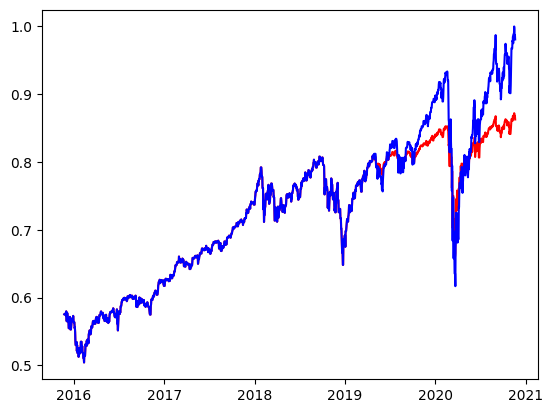

In [13]:
out_clean = []
for i in range(len(out)):
    out_clean.append(out[i][0][0])

prediction = np.concatenate((y_train, out_clean), axis=0)
print(y)

plt.plot(dates, prediction, 'r-', label='Predicted stock close price')
plt.plot(dates, y, 'b-', label='Actual stock close price')
plt.show

The data must then be scaled to find the actual close values of the stock. 

<function matplotlib.pyplot.show(close=None, block=None)>

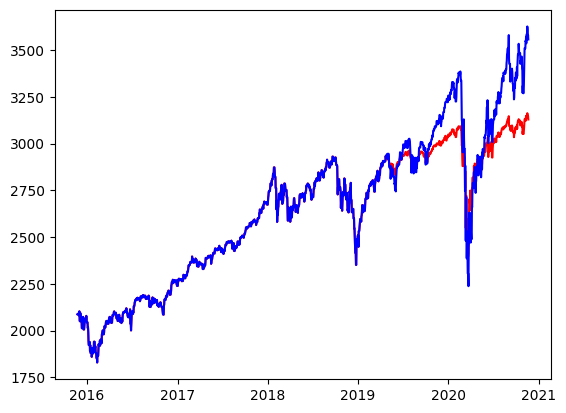

In [14]:
prediction_scaled_up = []
y_scaled_up = []
for i in range(len(prediction)):
    prediction_scaled_up.append(prediction[i] * scale)
    y_scaled_up.append(y[i] * scale)

plt.plot(dates, prediction_scaled_up, 'r-', label='Predicted stock close price')
plt.plot(dates, y_scaled_up, 'b-', label='Actual stock close price')
plt.show